# **Change CPU**

In [1]:
!nvidia-smi

Tue May 28 11:38:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Mount Google Drive**

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/NLP_DATASET/NLP_DATASET_URDU_TO_URDU.csv'


MessageError: Error: credential propagation was unsuccessful

# **Load Dataset Using Pandas**



In [ ]:
import pandas as pd
df = pd.read_csv(file_path)

# **Exploring Dataset**

In [ ]:
df.shape

(686, 5)

In [ ]:
df.columns

Index(['M_WORD', 'E_WORD', 'POS', 'MR_WORD', 'ER_WORD'], dtype='object')

In [ ]:
df.head()

,M_WORD,E_WORD,POS,MR_WORD,ER_WORD
0,محال,ناممکن,AD,mahaal,na mumkin
1,حقیر,چھوٹا,AD,haqeer,chhota
2,معتبر,قابلِ اعتبار,AD,mo'tabar,qabil-e-etbaar
3,بے تابعد,آزاد,AD,be taabed,azad
4,زیرگزر,گزرنا,V,zair guzar,guzarna


In [ ]:
df.tail()

,M_WORD,E_WORD,POS,MR_WORD,ER_WORD
681,لفظی طور پر,لفظ بہ لفظ,ADV,Lafz Bah Lafz,Lafzi Tor Par
682,مطلع کرنا,بتانا,V,Matla Karna,Batana
683,تخمینہ,قیمت کا اندازہ لگانا,VP,Takhmena,Qeemat Ka Andaza Lagana
684,تَخمِيَہ لَگانا,انداذہ لگانا,VP,Takhmena Lagana,Andaazah Lagana
685,ذہنی دباؤ,اداسی,N,Zehni Dabao,Udasi


# **Data Cleaning**

In [ ]:
# Finding any NaN values
df.isna().any()

M_WORD     False
E_WORD     False
POS        False
MR_WORD    False
ER_WORD    False
dtype: bool

# **Preprocessing**

# **Tokenization**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# Download Urdu resources for NLTK
nltk.download('punkt')

df['hard_urdu_tokens'] = df['M_WORD'].apply(lambda x: word_tokenize(x))
df['easy_urdu_tokens'] = df['E_WORD'].apply(lambda x: word_tokenize(x))
df['POS_tokens'] = df['POS'].apply(lambda x: word_tokenize(x))
df['hard_urdu_roman_tokens'] = df['MR_WORD'].apply(lambda x: word_tokenize(x))
df['easy_urdu_roman_tokens'] = df['ER_WORD'].apply(lambda x: word_tokenize(x))


output_file_path = '/content/gdrive/MyDrive/NLP_DATASET/preprocessed_NLP_DATASET_URDU_TO_URDU.csv'
df.to_csv(output_file_path, index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Print the entire DataFrame
#pd.set_option('display.max_rows', None)  # To display all rows
#pd.set_option('display.max_columns', None)  # To display all columns
#print(df)

#Reset
#pd.reset_option('display.max_rows')

In [ ]:
print(df[['hard_urdu_tokens', 'M_WORD']])
print(df[['easy_urdu_tokens', 'E_WORD']])
print(df[['POS', 'POS_tokens']])
print(df[['MR_WORD', 'hard_urdu_roman_tokens']])
print(df[['ER_WORD', 'easy_urdu_roman_tokens']])

       hard_urdu_tokens           M_WORD
0                [محال]             محال
1                [حقیر]             حقیر
2               [معتبر]            معتبر
3           [بے, تابعد]         بے تابعد
4              [زیرگزر]           زیرگزر
..                  ...              ...
681     [لفظی, طور, پر]      لفظی طور پر
682        [مطلع, کرنا]        مطلع کرنا
683            [تخمینہ]           تخمینہ
684  [تَخمِيَہ, لَگانا]  تَخمِيَہ لَگانا
685        [ذہنی, دباؤ]        ذہنی دباؤ

[686 rows x 2 columns]
              easy_urdu_tokens                E_WORD
0                     [ناممکن]                ناممکن
1                      [چھوٹا]                 چھوٹا
2              [قابلِ, اعتبار]          قابلِ اعتبار
3                       [آزاد]                  آزاد
4                      [گزرنا]                 گزرنا
..                         ...                   ...
681             [لفظ, بہ, لفظ]            لفظ بہ لفظ
682                    [بتانا]                 بتانا
683  [ق

# **Stop Words Two Coloumn M_WORD, E_WORD**

In [ ]:
from nltk.corpus import stopwords
# Download Urdu resources for NLTK
nltk.download('stopwords')
# Load your stopwords file from Google Drive
stopwords_path = '/content/gdrive/MyDrive/NLP_DATASET/urdu_stopwords.txt'

with open(stopwords_path, 'r', encoding='utf-8') as file:
    stop_words_list = [line.strip() for line in file]

# Add any additional stopwords specific to your dataset
# stop_words_list.extend(["additional", "stop", "words"])

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words_list]

# Tokenization and stopword removal for 'M_WORD' and 'E_WORD' columns
df['hard_urdu_tokens_stop'] = df['hard_urdu_tokens'].apply(remove_stopwords)
df['easy_urdu_tokens_stop'] = df['easy_urdu_tokens'].apply(remove_stopwords)
df['hard_urdu_roman_tokens_stop'] = df['hard_urdu_roman_tokens'].apply(remove_stopwords)
df['easy_urdu_roman_tokens_stop'] = df['easy_urdu_roman_tokens'].apply(remove_stopwords)

# Save the DataFrame to a new CSV file
output_file_path = '/content/gdrive/MyDrive/NLP_DATASET/preprocessed_NLP_DATASET_URDU_TO_URDU.csv'
df.to_csv(output_file_path, index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(df[['hard_urdu_tokens_stop', 'hard_urdu_tokens']])
print(df[['easy_urdu_tokens_stop', 'easy_urdu_tokens']])
print(df[['hard_urdu_roman_tokens_stop', 'hard_urdu_roman_tokens']])
print(df[['easy_urdu_roman_tokens_stop', 'easy_urdu_roman_tokens']])


    hard_urdu_tokens_stop    hard_urdu_tokens
0                  [محال]              [محال]
1                  [حقیر]              [حقیر]
2                 [معتبر]             [معتبر]
3                 [تابعد]         [بے, تابعد]
4                [زیرگزر]            [زیرگزر]
..                    ...                 ...
681           [لفظی, طور]     [لفظی, طور, پر]
682                [مطلع]        [مطلع, کرنا]
683              [تخمینہ]            [تخمینہ]
684            [تَخمِيَہ]  [تَخمِيَہ, لَگانا]
685          [ذہنی, دباؤ]        [ذہنی, دباؤ]

[686 rows x 2 columns]
     easy_urdu_tokens_stop           easy_urdu_tokens
0                 [ناممکن]                   [ناممکن]
1                  [چھوٹا]                    [چھوٹا]
2          [قابلِ, اعتبار]            [قابلِ, اعتبار]
3                   [آزاد]                     [آزاد]
4                  [گزرنا]                    [گزرنا]
..                     ...                        ...
681         [لفظ, بہ, لفظ]             [لفظ, ب

# **LowerCase three coloumn POS, MR_WORD, ER_ROMAN**

In [ ]:
def lowercase_text(tokens):
    return [token.lower() for token in tokens]

 # Perform text lowercasing
df['POS_tokens_low'] = df['POS_tokens'].apply(lowercase_text)
df['hard_urdu_roman_tokens_low'] = df['hard_urdu_roman_tokens'].apply(lowercase_text)
df['easy_urdu_roman_tokens_low'] = df['easy_urdu_roman_tokens'].apply(lowercase_text)

# Save the DataFrame to a new CSV file
output_file_path = '/content/gdrive/MyDrive/NLP_DATASET/preprocessed_NLP_DATASET_URDU_TO_URDU.csv'
df.to_csv(output_file_path, index=False)



In [ ]:
# Print the DataFrame after tokenization, stopword removal, and text lowercasing
print(df[['POS_tokens_low', 'POS_tokens']])
print(df[['hard_urdu_roman_tokens_low', 'hard_urdu_roman_tokens']])
print(df[['easy_urdu_roman_tokens_low', 'easy_urdu_roman_tokens']])

    POS_tokens_low POS_tokens
0             [ad]       [AD]
1             [ad]       [AD]
2             [ad]       [AD]
3             [ad]       [AD]
4              [v]        [V]
..             ...        ...
681          [adv]      [ADV]
682            [v]        [V]
683           [vp]       [VP]
684           [vp]       [VP]
685            [n]        [N]

[686 rows x 2 columns]
    hard_urdu_roman_tokens_low hard_urdu_roman_tokens
0                     [mahaal]               [mahaal]
1                     [haqeer]               [haqeer]
2                   [mo'tabar]             [mo'tabar]
3                 [be, taabed]           [be, taabed]
4                [zair, guzar]          [zair, guzar]
..                         ...                    ...
681          [lafz, bah, lafz]      [Lafz, Bah, Lafz]
682             [matla, karna]         [Matla, Karna]
683                 [takhmena]             [Takhmena]
684         [takhmena, lagana]     [Takhmena, Lagana]
685             [zehni

# **Removal Punctuation from four Coloumn**


In [ ]:
import string
def remove_punctuation(tokens):
    translator = str.maketrans('', '', string.punctuation)
    return [token.translate(translator) for token in tokens]


# Remove punctuation
#. , ? ! : ; ' " " ( ) [ ] { } ... - - /
df['hard_urdu_tokens_pun'] = df['hard_urdu_tokens_stop'].apply(remove_punctuation)
df['easy_urdu_tokens_pun'] = df['easy_urdu_tokens_stop'].apply(remove_punctuation)
df['hard_urdu_roman_tokens_pun'] = df['hard_urdu_roman_tokens_low'].apply(remove_punctuation)
df['easy_urdu_roman_tokens_pun'] = df['easy_urdu_roman_tokens_low'].apply(remove_punctuation)

# Save the DataFrame to a new CSV file
output_file_path = '/content/gdrive/MyDrive/NLP_DATASET/preprocessed_NLP_DATASET_URDU_TO_URDU.csv'
df.to_csv(output_file_path, index=False)

In [ ]:
# Print the DataFrame after tokenization, stopword removal, text lowercasing, and punctuation removal
print(df[['hard_urdu_tokens_pun', 'hard_urdu_tokens_stop']])
print(df[['easy_urdu_tokens_pun', 'easy_urdu_tokens_stop']])
print(df[['hard_urdu_roman_tokens_pun', 'hard_urdu_tokens_stop']])
print(df[['easy_urdu_roman_tokens_pun', 'easy_urdu_tokens_stop']])

    hard_urdu_tokens_pun hard_urdu_tokens_stop
0                 [محال]                [محال]
1                 [حقیر]                [حقیر]
2                [معتبر]               [معتبر]
3                [تابعد]               [تابعد]
4               [زیرگزر]              [زیرگزر]
..                   ...                   ...
681          [لفظی, طور]           [لفظی, طور]
682               [مطلع]                [مطلع]
683             [تخمینہ]              [تخمینہ]
684           [تَخمِيَہ]            [تَخمِيَہ]
685         [ذہنی, دباؤ]          [ذہنی, دباؤ]

[686 rows x 2 columns]
      easy_urdu_tokens_pun  easy_urdu_tokens_stop
0                 [ناممکن]               [ناممکن]
1                  [چھوٹا]                [چھوٹا]
2          [قابلِ, اعتبار]        [قابلِ, اعتبار]
3                   [آزاد]                 [آزاد]
4                  [گزرنا]                [گزرنا]
..                     ...                    ...
681         [لفظ, بہ, لفظ]         [لفظ, بہ, لفظ]
682         

In [ ]:
# Clean and preprocess the Urdu text data
def clean_urdu_text(text):
    # Tokenize and remove stop words
    tokens = [word for word in text.split() if word not in urdu_stop_words]

    # Join tokens to form cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text


# **Label DataSet**

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/gdrive/MyDrive/NLP_DATASET/NLP_DATASET_URDU_TO_URDU.csv')


# Label encode the target columns

label_encoder_E_WORD = LabelEncoder()
label_encoder_POS = LabelEncoder()
label_encoder_MR_WORD = LabelEncoder()
label_encoder_ER_WORD = LabelEncoder()

df['E_WORD'] = label_encoder_E_WORD.fit_transform(df['E_WORD'])
df['POS'] = label_encoder_POS.fit_transform(df['POS'])
df['MR_WORD'] = label_encoder_MR_WORD.fit_transform(df['MR_WORD'])
df['ER_WORD'] = label_encoder_ER_WORD.fit_transform(df['ER_WORD'])

# **FEATURES(X) AND TARGET(Y)**

In [ ]:
# Define features (X) and targets (Y)
X = df['M_WORD']
Y = df[['E_WORD', 'POS', 'MR_WORD', 'ER_WORD']]

# **SPLIT DATASET INTO TEST AND TRAIN**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# **Text Classification Pipeline with Multinomial Naive Bayes and MultiOutputClassifier in scikit-learn**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline with CountVectorizer and Multinomial Naive Bayes for each target
model = make_pipeline(
    CountVectorizer(),
    MultiOutputClassifier(MultinomialNB())
)

# **TRAIN MODEL AND MAKING PREDICTION**

In [ ]:
# Train the model
model.fit(X_train, Y_train)
# Predictions
predictions = model.predict(X_test)

# **Model Evaluation and Translation Function for Text Classification**

In [3]:
from sklearn.metrics import accuracy_score, classification_report
# Model Evaluation
for i, target_column in enumerate(Y_test.columns):
    accuracy = accuracy_score(Y_test.iloc[:, i], predictions[:, i])
    print(f'Accuracy for {target_column}: {accuracy}')
    print(f'Classification Report for {target_column}:')
    print(classification_report(Y_test.iloc[:, i], predictions[:, i], zero_division=1))
    print('\n')
def get_translation(model, input_word, label_encoders, default_output="Out of Vocabulary"):
    # Make prediction using the trained model
    if isinstance(model, MultiOutputClassifier):
        predicted_labels = model.predict([input_word])[0]
    else:
        predicted_labels = model.predict([input_word])

    # Flatten the array if it's not already flattened
    predicted_labels_flat = predicted_labels.flatten()

    # Reverse the label encoding to get the original Urdu words
    predicted_words = []
    for i, label in enumerate(predicted_labels_flat):
        try:
            word = label_encoders[i].inverse_transform([label])[0]
        except ValueError:
            # Handle out-of-vocabulary words
            word = default_output
        predicted_words.append(word)

    return predicted_words

# Example usage with default output for out-of-vocabulary words


NameError: name 'Y_test' is not defined

Metrics for E_WORD:
Accuracy: 0.0
Precision: 1.0
Recall: 0.0
F1-score: 0.0
Classification Report for E_WORD:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00       1.0
           2       1.00      0.00      0.00       2.0
           5       1.00      0.00      0.00       1.0
          17       0.00      1.00      0.00       0.0
          18       1.00      0.00      0.00       1.0
          20       0.00      1.00      0.00       0.0
          22       0.00      1.00      0.00       0.0
          25       1.00      0.00      0.00       1.0
          28       0.00      1.00      0.00       0.0
          29       1.00      0.00      0.00       1.0
          42       0.00      1.00      0.00       0.0
          51       0.00      1.00      0.00       0.0
          53       1.00      0.00      0.00       1.0
          57       1.00      0.00      0.00       1.0
          60       1.00      0.00      0.00       1.0
          63       1.00   

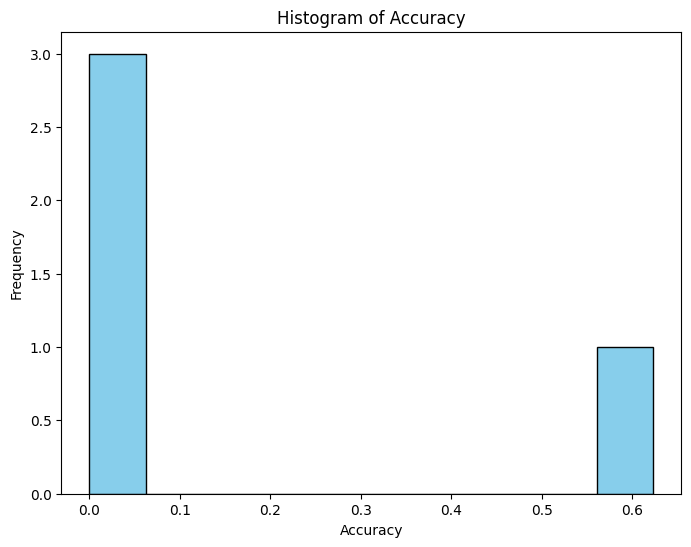

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Model Evaluation
accuracies = []  # Collect accuracy values for each target column

for i, target_column in enumerate(Y_test.columns):
    accuracy = accuracy_score(Y_test.iloc[:, i], predictions[:, i])
    accuracies.append(accuracy)

    precision = precision_score(Y_test.iloc[:, i], predictions[:, i], average='weighted', zero_division=1)
    recall = recall_score(Y_test.iloc[:, i], predictions[:, i], average='weighted', zero_division=1)
    f1 = f1_score(Y_test.iloc[:, i], predictions[:, i], average='weighted', zero_division=1)

    print(f'Metrics for {target_column}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')

    print(f'Classification Report for {target_column}:')
    print(classification_report(Y_test.iloc[:, i], predictions[:, i], zero_division=1))
    print('\n')

# Plotting Histogram of Accuracy with Color
plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


# **CHECK RESULT**

In [ ]:
input_word = "معتبر"
output_words = get_translation(model, input_word, [label_encoder_E_WORD, label_encoder_POS, label_encoder_MR_WORD, label_encoder_ER_WORD])
print(f"Input: {input_word}, Predicted Output: {output_words}")

Input: معتبر, Predicted Output: ['قابل اعتماد', 'N', "mu'tabar", "qaabil e'temaad"]


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_poetry(poetry):
    return word_tokenize(poetry)

def identify_difficult_words(poetry_tokens, difficult_words):
    return [word for word in poetry_tokens if word in difficult_words]

def get_easy_meaning(difficult_word, model, label_encoders, default_output="Out of Vocabulary"):
    output_words = get_translation(model, difficult_word, label_encoders, default_output)
    return output_words[0]  # Assuming we're interested in the easy meaning of the first output

# Prompt user to input poetry
input_poetry = input("Enter your poetry: ")

# Tokenize the input poetry
poetry_tokens = tokenize_poetry(input_poetry)

# Identify difficult words
difficult_words = set(poetry_tokens).intersection(set(df['M_WORD']))

# Provide easy meanings for difficult words
easy_meanings = {}
for word in difficult_words:
    easy_meanings[word] = get_easy_meaning(word, model, [label_encoder_E_WORD, label_encoder_POS, label_encoder_MR_WORD, label_encoder_ER_WORD])

# Print the results
print("Difficult Words and Their Easy Meanings:")
for word, meaning in easy_meanings.items():
    print(f"{word}: {meaning}")


Enter your poetry: معتبر ملے جو کوئی ہم سا تو تھام کے رکھنا ہم بھی تو دیکھیں۔۔۔۔۔ مدِ مقابل اپنا 
Difficult Words and Their Easy Meanings:
معتبر: قابل اعتماد


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_poetry(poetry):
    return word_tokenize(poetry)

def identify_difficult_words(poetry_tokens, difficult_words):
    return [word for word in poetry_tokens if word in difficult_words]

def get_easy_meaning(difficult_word, model, label_encoders, default_output="Out of Vocabulary"):
    output_words = get_translation(model, difficult_word, label_encoders, default_output)
    return output_words[0]  # Assuming we're interested in the easy meaning of the first output

def replace_difficult_words(poetry_tokens, difficult_words, easy_meanings):
    replaced_poetry = []
    for word in poetry_tokens:
        if word in difficult_words:
            replaced_poetry.append(easy_meanings[word])
        else:
            replaced_poetry.append(word)
    return replaced_poetry

# Prompt user to input poetry
input_poetry = input("Enter your poetry: ")

# Tokenize the input poetry
poetry_tokens = tokenize_poetry(input_poetry)

# Identify difficult words
difficult_words = set(poetry_tokens).intersection(set(df['M_WORD']))

# Provide easy meanings for difficult words
easy_meanings = {}
for word in difficult_words:
    easy_meanings[word] = get_easy_meaning(word, model, [label_encoder_E_WORD, label_encoder_POS, label_encoder_MR_WORD, label_encoder_ER_WORD])

# Replace difficult words with easy meanings
replaced_poetry_tokens = replace_difficult_words(poetry_tokens, difficult_words, easy_meanings)

# Join the replaced tokens back into a string
replaced_poetry = ' '.join(replaced_poetry_tokens)

# Print the replaced poetry
print("Poetry with Difficult Words Replaced by Easy Meanings:")
print(replaced_poetry)


Enter your poetry: مل تو جاتے ہیں سب اپناکہنےوالے پر اپنا وہ جو بن کہے آپ کی معتبر کو سمجھے 
Poetry with Difficult Words Replaced by Easy Meanings:
مل تو جاتے ہیں سب اپناکہنےوالے پر اپنا وہ جو بن کہے آپ کی قابل اعتماد کو سمجھے
